# Data Cleaning
First imported the necessary libraries to work with, then ingested the data, and proceeded to clean and prepare for getting the necessary statistical information.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('CustomerData.csv')

In [3]:
df

,CustomerID,Age,Gender,ProductQualityRating,StoreCleanlinessRating,StaffFriendlinessRating,OverallSatisfactionRating,PurchaseAmount,CustomerLocation,FrequencyofVisits,ProductCategory,MembershipStatus,CustomerLoyaltyScore
0,1,34,Male,4,5,5,4,120.50,Oregon,Weekly,Electronics,Member,85
1,2,28,Female,5,4,4,5,155.75,Texas,Monthly,Clothing,Non-Member,70
2,3,42,Male,3,3,4,3,75.20,Vermont,Rarely,Groceries,Member,92
3,4,50,Female,4,5,5,5,220.00,Alabama,Weekly,Electronics,Member,78
4,5,22,Male,2,2,3,2,45.80,Nevada,Daily,Clothing,Non-Member,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,834,30,Female,4,4,5,4,110.25,Florida,Monthly,Groceries,Member,82
834,835,37,Male,4,5,4,4,125.40,California,Weekly,Electronics,Member,78
835,836,25,Female,3,3,3,3,88.20,New York,Monthly,Clothing,Non-Member,70
836,837,33,Male,4,4,5,4,120.60,Florida,Weekly,Electronics,Member,88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 838 non-null    int64  
 1   Age                        838 non-null    int64  
 2   Gender                     838 non-null    object 
 3   ProductQualityRating       838 non-null    int64  
 4   StoreCleanlinessRating     838 non-null    int64  
 5   StaffFriendlinessRating    838 non-null    int64  
 6   OverallSatisfactionRating  838 non-null    int64  
 7   PurchaseAmount             835 non-null    float64
 8   CustomerLocation           838 non-null    object 
 9   FrequencyofVisits          838 non-null    object 
 10  ProductCategory            838 non-null    object 
 11  MembershipStatus           838 non-null    object 
 12  CustomerLoyaltyScore       838 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 8

In [6]:
df.isna().sum()

CustomerID                   0
Age                          0
Gender                       0
ProductQualityRating         0
StoreCleanlinessRating       0
StaffFriendlinessRating      0
OverallSatisfactionRating    0
PurchaseAmount               3
CustomerLocation             0
FrequencyofVisits            0
ProductCategory              0
MembershipStatus             0
CustomerLoyaltyScore         0
dtype: int64

In [7]:
df.head(10)

,CustomerID,Age,Gender,ProductQualityRating,StoreCleanlinessRating,StaffFriendlinessRating,OverallSatisfactionRating,PurchaseAmount,CustomerLocation,FrequencyofVisits,ProductCategory,MembershipStatus,CustomerLoyaltyScore
0,1,34,Male,4,5,5,4,120.50,Oregon,Weekly,Electronics,Member,85
1,2,28,Female,5,4,4,5,155.75,Texas,Monthly,Clothing,Non-Member,70
2,3,42,Male,3,3,4,3,75.20,Vermont,Rarely,Groceries,Member,92
3,4,50,Female,4,5,5,5,220.00,Alabama,Weekly,Electronics,Member,78
4,5,22,Male,2,2,3,2,45.80,Nevada,Daily,Clothing,Non-Member,60
5,6,38,Female,5,4,5,5,198.40,Delaware,Weekly,Electronics,Member,88
6,7,45,Male,4,5,4,4,150.60,Wisconsin,Monthly,Groceries,Non-Member,75
7,8,29,Female,3,3,3,3,85.30,Oklahoma,Rarely,Clothing,Member,68
8,9,31,Male,4,4,5,4,110.25,Kentucky,Weekly,Electronics,Member,90
9,10,26,Female,3,3,4,3,70.90,Arkansas,Monthly,Groceries,Non-Member,72


In [9]:
df.describe()

,CustomerID,Age,ProductQualityRating,StoreCleanlinessRating,StaffFriendlinessRating,OverallSatisfactionRating,PurchaseAmount,CustomerLoyaltyScore
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,835.000000,838.000000
mean,419.500000,40.585919,3.661098,3.946301,4.189737,3.742243,104.653653,77.599045
std,242.054057,14.239264,0.929891,0.876198,0.745221,0.955600,72.698678,9.903675
min,1.000000,18.000000,2.000000,2.000000,3.000000,2.000000,5.990000,60.000000
25%,210.250000,29.000000,3.000000,3.000000,4.000000,3.000000,48.525000,70.000000
50%,419.500000,38.000000,4.000000,4.000000,4.000000,4.000000,87.750000,78.000000
75%,628.750000,50.000000,4.000000,5.000000,5.000000,4.000000,147.000000,88.000000
max,838.000000,83.000000,5.000000,5.000000,5.000000,5.000000,299.300000,92.000000


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
833    False
834    False
835    False
836    False
837    False
Length: 838, dtype: bool

# Mean, Median, & Mode
I started getting the mean, median and mode of Age, but we decided to, instead, focus on Overall Satisfaction Rating. 

In [18]:
 df['Age'].mean()

np.float64(40.585918854415276)

In [17]:
df['Age'].median()

np.float64(38.0)

In [16]:
df['Age'].mode()

0    29
Name: Age, dtype: int64

In [19]:
df['OverallSatisfactionRating'].mean()

np.float64(3.7422434367541766)

In [20]:
df['OverallSatisfactionRating'].median()

np.float64(4.0)

In [21]:
df['OverallSatisfactionRating'].mode()

0    4
Name: OverallSatisfactionRating, dtype: int64

# Range

In [23]:
min_rating = np.min(df['OverallSatisfactionRating'])
print(min_rating)

2


In [24]:
max_rating = np.max(df['OverallSatisfactionRating'])
print(max_rating)

5


In [25]:
range_rating = max_rating - min_rating
print(range_rating)

3


# Variance and Standard Deviation

In [26]:
 df['OverallSatisfactionRating'].var()

np.float64(0.9131715440130254)

In [27]:
df['OverallSatisfactionRating'].std()

np.float64(0.9556000962814023)

# IQR, Outliers , Skrewness & Kurtosis

In [30]:
Q3 = np.percentile(df['OverallSatisfactionRating'], 75)
Q1 = np.percentile(df['OverallSatisfactionRating'], 25)
IQR = Q3 - Q1

In [31]:
IQR

np.float64(1.0)

In [32]:
skewness = df['OverallSatisfactionRating'].skew()
kurtosis = df['OverallSatisfactionRating'].kurtosis()
print('Skewness', skewness)
print('Kurtosis', kurtosis)

Skewness -0.2890572585805967
Kurtosis -0.8541900515422598


In [33]:
#Outliers
def find_outliers_iqr(series, threshold =1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return(series < lower_bound) | (series > upper_bound)

find_outliers_iqr(df['OverallSatisfactionRating']).sum()    

np.int64(0)

# Visualizations

The regression plot reveals a clear, positive linear relationship between loyalty score and overall rating: as customer's loyalty scores increase, so do their ratings. 

Text(0.5, 1.0, 'Customer Satisfaction vs Loyalty Score')

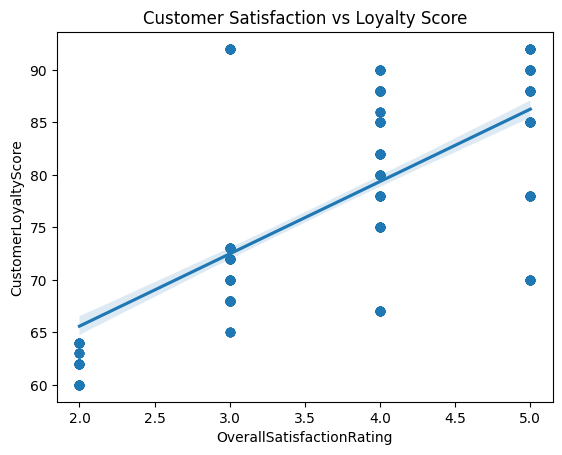

In [52]:
sns.regplot(df, x='OverallSatisfactionRating', y='CustomerLoyaltyScore')
plt.title('Customer Satisfaction vs Loyalty Score')

The box plot of the rating distribution shows a minimum value of 2 and a maximum value of 5. Because no points fall beyond 1.5*IQR from the quartiles, there are no outliers marked separately. Thus the complete span of the data, from lowest to highest rating is captured by the whiskers at 2(minimum) and 5(maximum). 

Text(0.5, 1.0, 'Distribution Rating')

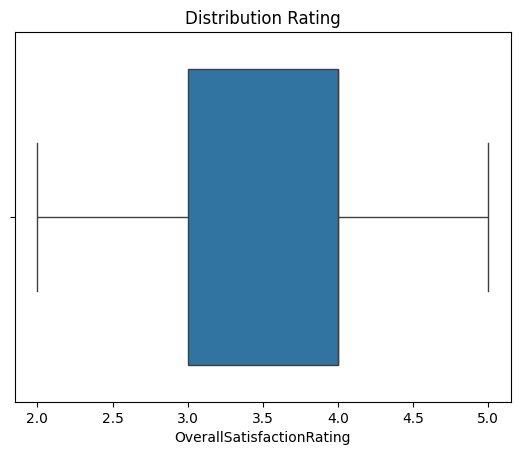

In [54]:
sns.boxplot(df, x='OverallSatisfactionRating')
plt.title('Distribution Rating')

The histogram of satisfaction ratings reveals that most customers scores fall between 4.0 and 4.2. A concentration around 4.0-4.2 suggests consistently high satisfaction, though the exact spread (width of the peak)shows how tight that consensus is. If you see the bars toward lower ratings, it may point to a small group of dissasitified customers worth investigating; similarly, a bar above 4.2 shows truly exceptional feedback. 

Text(0.5, 1.0, 'Satisfaction Rating')

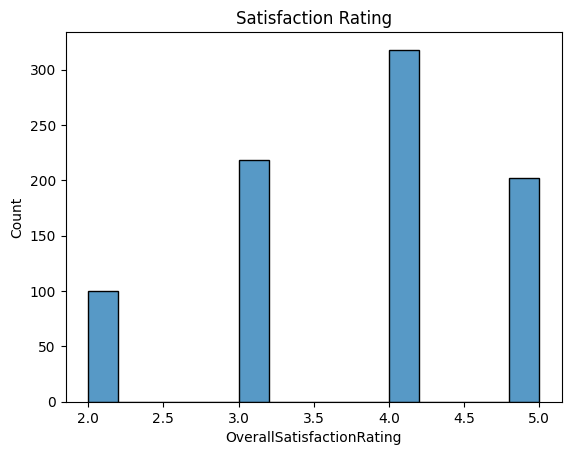

In [55]:
sns.histplot(df, x='OverallSatisfactionRating')
plt.title('Satisfaction Rating')

The bar plot displays average customer satisfaction scores for different purchase, frequency groups, and it clearly shows that as the number of purchases increases, the average satisfaction rating rises. This patter suggests loyalty and repeat business correlate with better experiences or perceptions of value. It may be worthwhile to investigate what drives high frequency buyers' satisfaction, such as special perks or familiarity with the process, and consider how to extend those benefits to less frequent buyers. 

Text(0.5, 1.0, 'Customer Satisfaction vs Purchases')

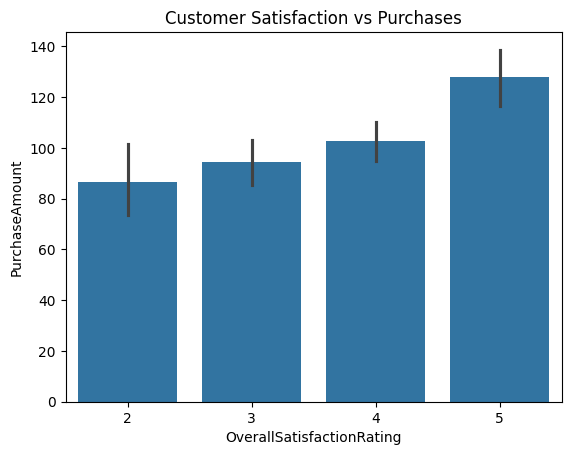

In [56]:
sns.barplot(df, x='OverallSatisfactionRating', y='PurchaseAmount')
plt.title('Customer Satisfaction vs Purchases')

# T-Test

In [ ]:
Ho OSR = 4.5
Ha OSR != 4.5

In [37]:
n = df['OverallSatisfactionRating'].count()
degrees_of_freedom = n - 1
x_bar = df['OverallSatisfactionRating'].mean()
mu = 4.5
std = df['OverallSatisfactionRating'].std(ddof=1)
root_n = np.sqrt(n)
t = (x_bar-mu)/(std/root_n)

In [38]:
n

np.int64(838)

In [39]:
x_bar

np.float64(3.7422434367541766)

In [40]:
std

np.float64(0.9556000962814023)

In [41]:
root_n

np.float64(28.948229652260256)

In [42]:
t

np.float64(-22.954906658870833)

In [43]:
t_stat, p_two_sided = stats.ttest_1samp(df['OverallSatisfactionRating'], popmean=mu)

In [44]:
t_stat

np.float64(-22.954906658870833)

In [45]:
p_two_sided

np.float64(7.880766538185801e-91)

# Confidence Interval

In [6]:
#Sample Stats
mean = df['OverallSatisfactionRating'].mean()
std = df['OverallSatisfactionRating'].std(ddof=1)
n = len(df['OverallSatisfactionRating'])

In [7]:
# Standard Error 
se = std/np.sqrt(n)
print(se)

0.033010657569064496


In [8]:
# Confidence Level = 95%
alpha = 0.05
d_f = n - 1
crit_t = stats.t.ppf(alpha,d_f)
print(crit_t)

-1.646676168563442


In [9]:
# Margin Of Error
moe = crit_t * se
print(moe)

-0.054357863127586906


In [10]:
# Confidence Interval
lower_bound = mean - moe
upper_bound = mean + moe
print('Confidenec Interval: ', lower_bound, upper_bound)

Confidenec Interval:  3.7966012998817633 3.68788557362659


In [11]:
print(mean)

3.7422434367541766


# Conclusion
Because p_two_sided is far smaller than alpha, we know the likelihood that the true popultion mean is 4.5 is VERY unlikely, thus we can safely reject the null hypothesis that mu = 4.5 Overall Satisfaction Rating. 
- We are 95% sure that the Overall Satissfaction Rating is between 3.69 and 3.80.